In [49]:
Exploratory Data Analysis - Project 1
import numpy as np
import pandas as pd

In [62]:
df_input = pd.read_csv("diabetes.csv")

In [63]:
df_input.head()
## The dataset has a labelled data with attributes related to diagnose diabetes. Pregnancies and Outcome are categorical data.
## Age, Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction are numeric and continuous data - interval variable.
## This is a wide-form data.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df_input.info()
## This dataset has 768 rows with 9 numeric fields. All numeric fields are candidate for statictical calculations. 
## There are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df_input.describe()
## Pregnancies std and mean are near which tells the 50% of collected sample are close to mean value. 
## Outcome Mean is less than 50% percent which tells that the dataset does not have balanced data.
## SkinThickness is right skewed as 75% of data are less then 32
## The observations has data ranging from 21 to 81 years old.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BADA432470>,
      dtype=object)

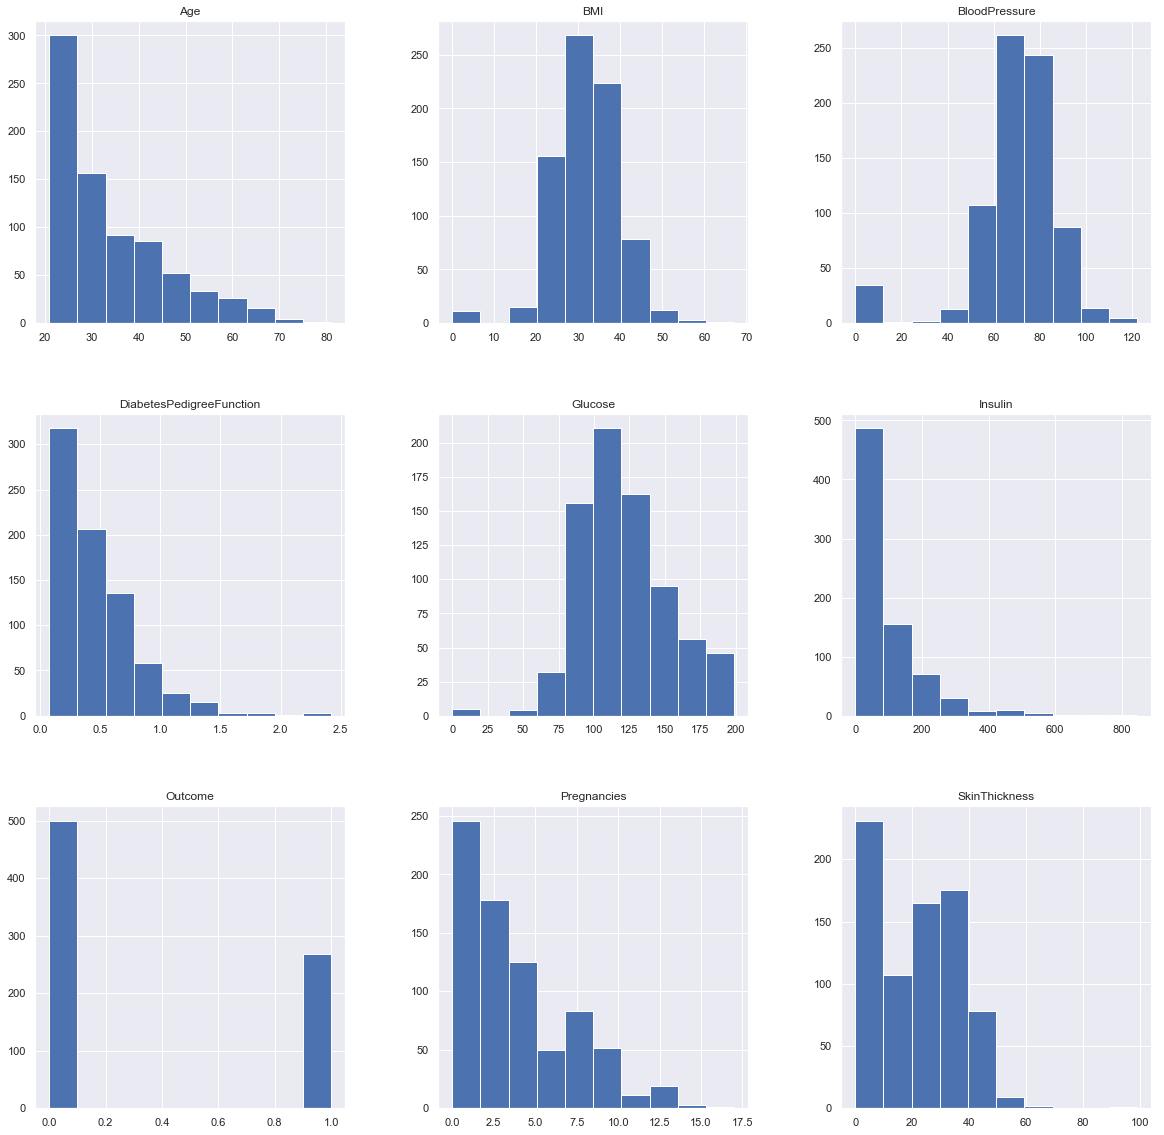

In [68]:
## Univariate Distribution - Estimate plot
df_input.hist(figsize=(20,20))
## Distribution is right skewed for age, pregnancies, DiabetesPedegreeFunction, Insulin
## There are outlier for BMI, Blood pressure, Glucose
## Distribution is left skewed for Glucose
## Majority of observations have age between 20 to 35. 
## Majority of observations have DiabetesPedegreeFunction falls less than 0.5

In [69]:
pd.crosstab(df_input["Outcome"], df_input["Pregnancies"])
## Risk for diabetec is more for pregnancies 3 and above

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


In [70]:
pd.crosstab(df_input["Outcome"], df_input["Age"])

Age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
Outcome,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,16,15,...,4,1,3,2,2,1,2,0,1,1
1,5,11,7,8,14,8,8,10,13,6,...,0,0,0,2,1,0,0,1,0,0


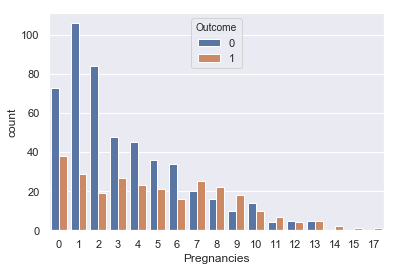

In [71]:
sns.countplot(x="Pregnancies", hue="Outcome", data=df_input)

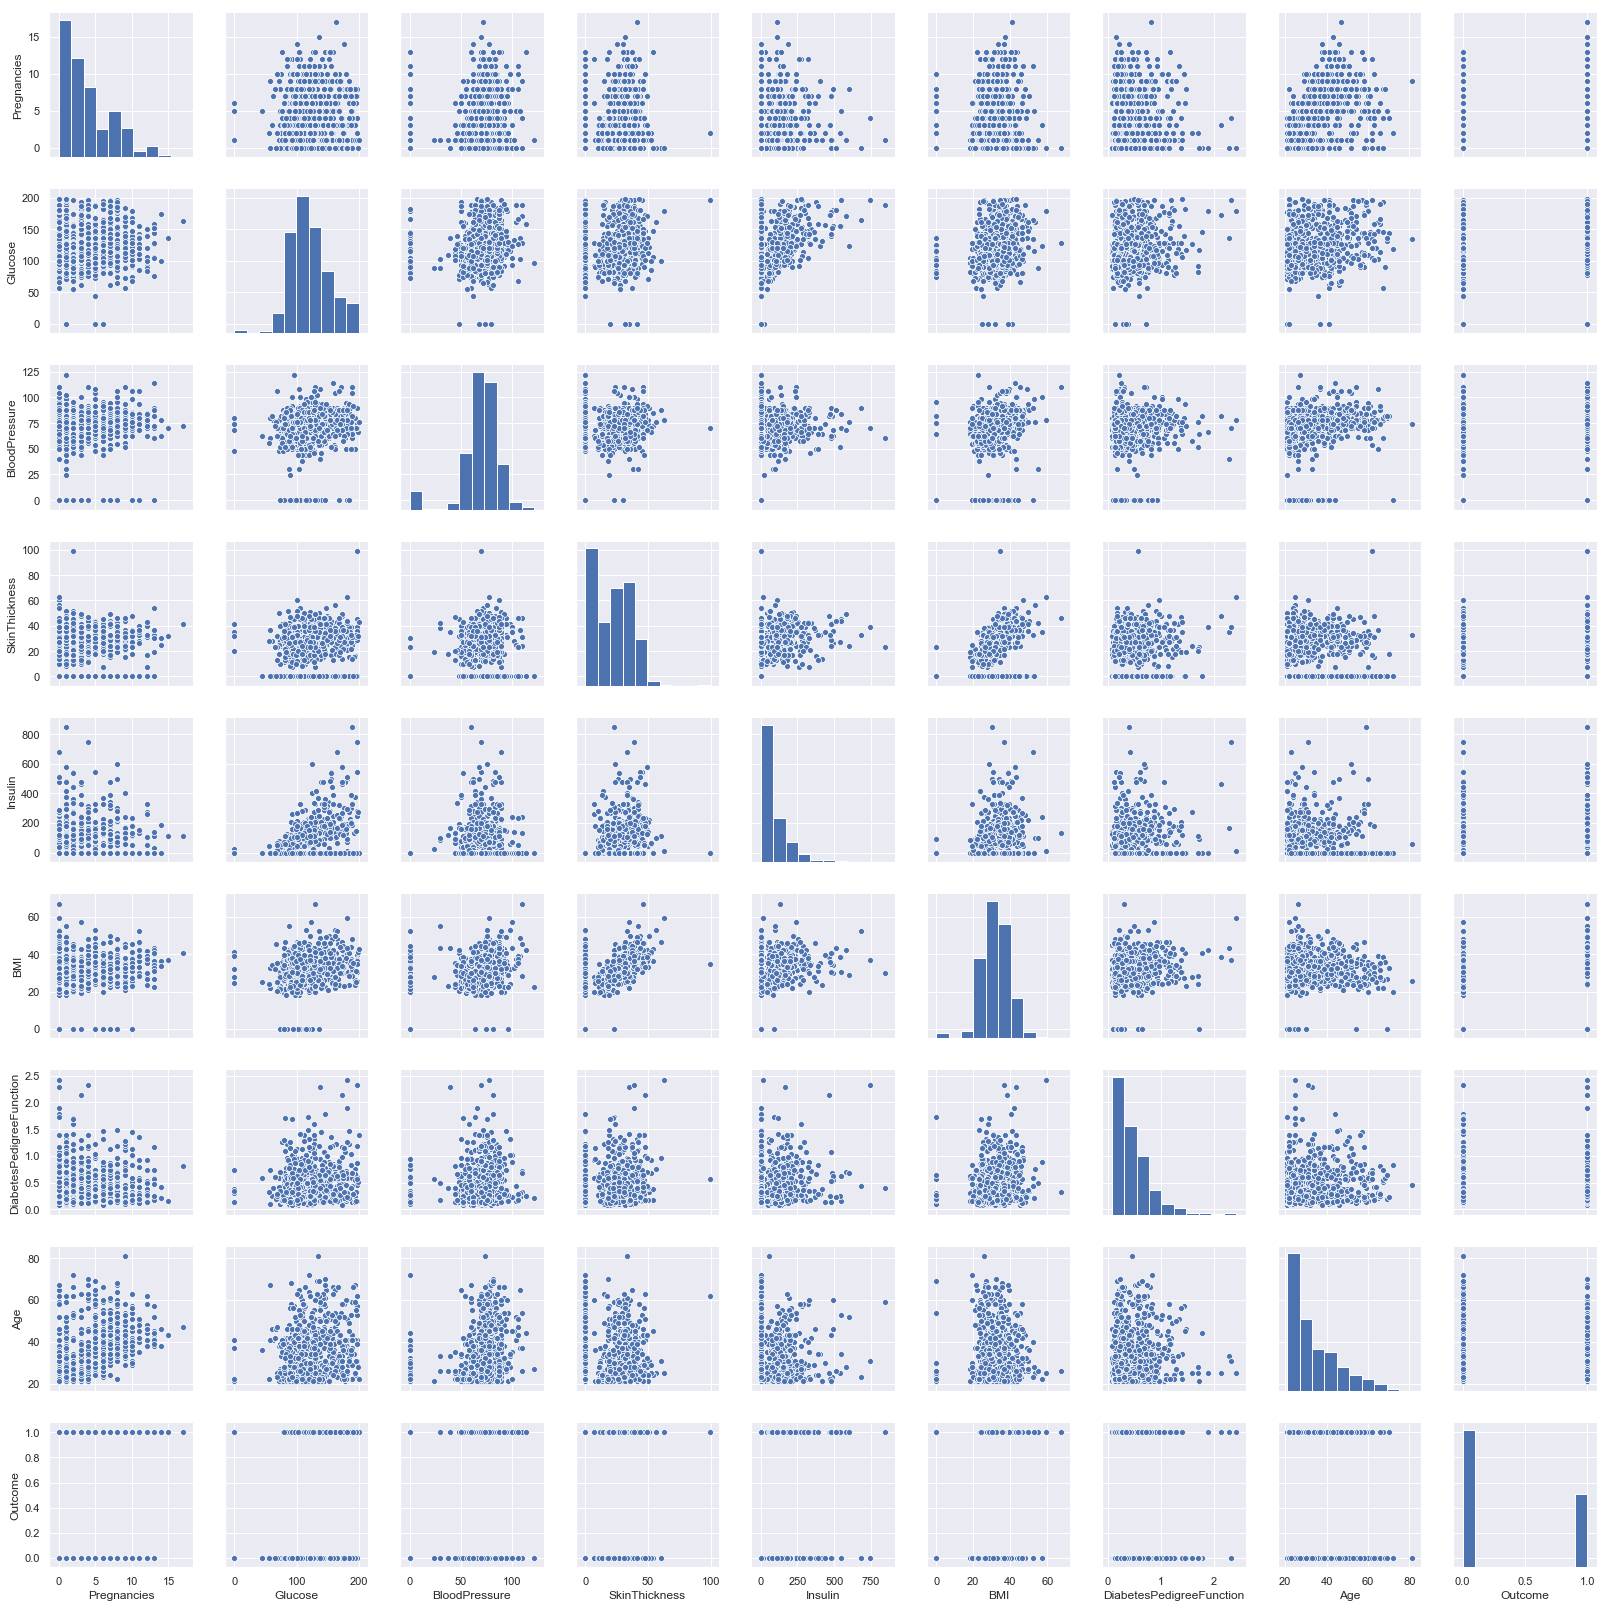

In [72]:
## Categorical - Bivariate Distribution plot
sns.pairplot(df_input)
## a) The correlation between Pregnence and Age is positive linear with weak strength. 
## b) There is a very weak relationship between Glucose and Blood pressure with many outliers.
## c) BMI and skin thickness is relatively strong linear with many outliers.
##    Skin thickness relationship with other than BMI variables are non-linear. 
## d) Glucose and insuline positive non-linear slope with weak strength.
## e) DiabetesPedigreeFunction has negative non-linear relationship with Insulin and Age.
## f) Relation between Glucose and Outcome - The risk of diabetes is likely to occur for the Glucose level above 70 with one outlier.
## g) Relation between DiabetesPedigreeFunction and Outcome - The risk of diabetes is more likely for the DPF below 1.5.

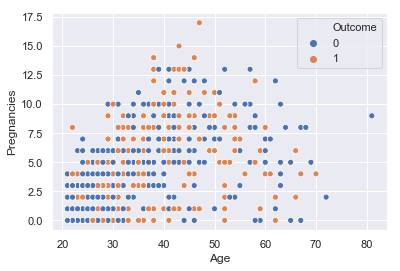

In [73]:
sns.scatterplot(x="Age", y="Pregnancies", hue="Outcome", data=df_input)

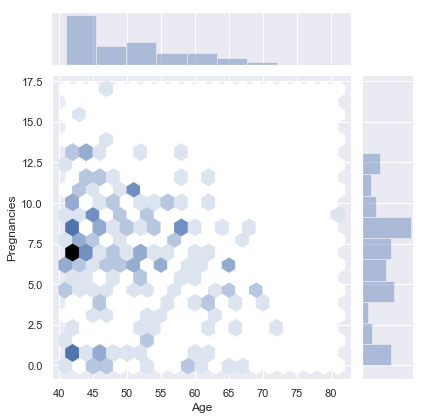

In [74]:
# Since the above plot has overplotting the suggested plot is hex plot
sns.jointplot(x="Age", y="Pregnancies",  data=df_input[df_input["Age"]>40], kind='hex', gridsize=20)
# For age greater then 40 the highest number of pregnancies is 7.

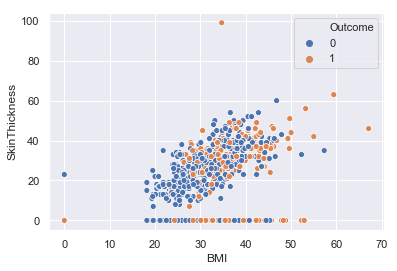

In [75]:
sns.scatterplot(x="BMI", y="SkinThickness", hue="Outcome", data=df_input)

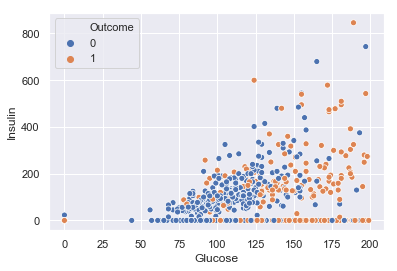

In [76]:
sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data=df_input)
### There are more chances for having Diabetec with increase in Glucose level 

In [77]:
pd.pivot_table(df_input, index=['Pregnancies'],
                     columns=[ 'Outcome'])
# No data for Pregnancies > 13 with Outcome 0 - Pregnancies > 13 likely to have Diabetes.

Age                   BMI            BloodPressure  \
Outcome              0          1          0          1             0   
Pregnancies                                                             
0            27.095890  28.578947  31.727397  39.213158     69.205479   
1            25.254717  35.103448  29.616038  37.793103     66.830189   
2            25.892857  32.947368  29.679762  34.578947     61.940476   
3            28.770833  29.481481  29.231250  32.548148     65.708333   
4            30.066667  38.086957  31.255556  33.873913     71.577778   
5            39.416667  38.380952  31.100000  36.780952     74.666667   
6            37.147059  44.000000  29.591176  31.775000     66.382353   
7            42.500000  40.000000  29.975000  34.756000     70.350000   
8            49.625000  42.272727  30.693750  32.204545     75.312500   
9            46.000000  43.166667  28.840000  33.300000     70.400000   
10           43.357143  41.700000  30.114286  31.380000     72.857143   
11           40.750000  46.714286  37.125000  39.385714     81.000000   
12           48.200000  46.500000  30.560000  34.575000     80.200000   
13           46.800000  42.200000  33.280000  36.720000     74.400000   
14                 NaN  42.000000        NaN  35.100000           NaN   
15                 NaN  43.000000        NaN  37.100000           NaN   
17                 NaN  47.000000        NaN  40.900000           NaN   

                       DiabetesPedigreeFunction               Glucose  \
Outcome              1                        0         1           0   
Pregnancies                                                             
0            63.210526                 0.457055  0.643368  111.945205   
1            71.310345                 0.451679  0.613759  104.254717   
2            69.052632                 0.479881  0.543737  105.214286   
3            68.148148                 0.358354  0.563333  109.604167   
4            67.000000                 0.410511  0.516478  117.555556   
5            78.857143                 0.359278  0.460095  111.666667   
6            72.750000                 0.433294  0.421500  115.352941   
7            71.120000                 0.405500  0.474120  121.000000   
8            75.090909                 0.526750  0.488682  106.625000   
9            82.055556                 0.311100  0.683778  107.000000   
10           66.500000                 0.411071  0.514500  117.571429   
11           70.285714                 0.259000  0.673143  113.250000   
12           71.500000                 0.301200  0.623250  111.000000   
13           73.200000                 0.405600  0.521000  117.200000   
14           70.000000                      NaN  0.312000         NaN   
15           70.000000                      NaN  0.153000         NaN   
17           72.000000                      NaN  0.817000         NaN   

                           Insulin             SkinThickness             
Outcome               1          0           1             0          1  
Pregnancies                                                              
0            144.236842  77.561644   89.578947     21.054795  24.605263  
1            143.793103  84.320755  151.137931     23.047170  29.517241  
2            135.473684  72.619048  144.315789     20.107143  28.210526  
3            148.444444  62.020833  132.666667     17.520833  24.629630  
4            139.913043  78.466667   51.782609     18.422222  10.913043  
5            131.190476  46.861111   75.190476     17.166667  17.761905  
6            132.375000  69.029412   52.000000     18.705882  15.375000  
7            148.800000  72.500000   94.040000     19.350000  21.040000  
8            150.000000  14.500000  149.772727     12.937500  20.500000  
9            144.944444  71.200000   57.555556     22.400000  20.055556  
10           125.600000  25.071429   48.400000     10.571429  22.900000  
11           134.000000   0.000000  102.857143     10.000000 

In [78]:
## Categorical - Distribution plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BAE030B710>,
      dtype=object)

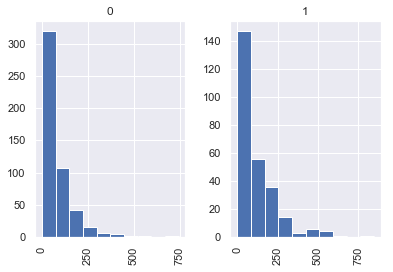

In [79]:
df_input.hist(by='Outcome',column = 'Insulin')

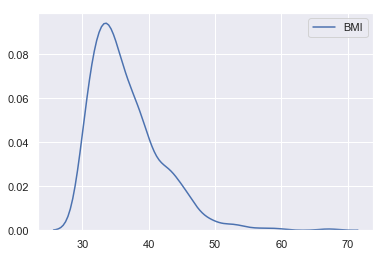

In [80]:
#print(type(df_input['BMI']))
sns.kdeplot(df_input.query('BMI > 30').BMI)
#Count of BMI greater than 30. Max frequencies lies around 35

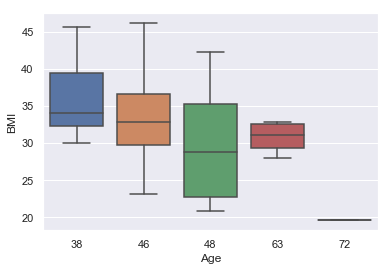

In [97]:
# Boxplot - better works for nominal variable and interval variable - DiabetesPedigreeFunction
df_aged=df_input[df_input.Age.isin(df_input.Age.value_counts().head(5))]
sns.boxplot(x='Age',y='BMI',data=df_aged)
# Averege BMI is highest for 38 years which means most of them are in overweight range or in obese range.  
# For 48 years the data is left skewed as the distance between the mean and maximum is greater than the distance between mean and min
# Average BMI varies with different age groups 